In [1]:
import sklearn as linear_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets 
from sklearn.linear_model import LinearRegression

### Standarisasi

Scaling, minimize gap, show outlier

In [3]:
data={
    'TB':[0.8,0.85,0.92,0.88,0.82,0.86,0.87,0.93,0.81,1],
    'BB':[20,25,21,29,30,21,28,27,29,30]
}
data=pd.DataFrame(data)
data

,TB,BB
0,0.80,20
1,0.85,25
2,0.92,21
3,0.88,29
4,0.82,30
5,0.86,21
6,0.87,28
7,0.93,27
8,0.81,29
9,1.00,30


<hr>

## Standarisasi Formula

Standarisasi $\displaystyle z=\frac {X-\bar{X}} {s} $
dengan standard deviasi 
$\displaystyle s = \sqrt{\frac{\sum(x-\bar{x})^2}{n-1}} $

- high outlier jika $ z_{score} >2.5 $
- low outlier jika $ z_{score} < -2.5 $
- Data terstandarisasi mean ~ 0 dan std ~1

In [4]:
data['TB'].std()

0.06186005711819757

In [8]:
print(np.std(data['TB']))
np.std(data['TB'], ddof=1) 
#delta degree of fredom -- feature nya -- kalau di excel sama pandas ddof=  1. kalau di sklearn dan numpy defualtnya ddof= 0

0.05868560300448484


0.06186005711819757

In [16]:
data['Z TB PD']= (data['TB']-data['TB'].mean())/data['TB'].std()
data['Z BB PD']= (data['BB']-data['BB'].mean())/data['BB'].std()
data

data['Z TB NP']= (data['TB']-data['TB'].mean())/np.std(data['TB'])
data['Z BB NP']= (data['BB']-data['BB'].mean())/np.std(data['BB'])
data

,TB,BB,Z TB PD,Z BB PD,Z TB NP,Z BB NP
0,0.80,20,-1.196248,-1.510526,-1.260957,-1.592235
1,0.85,25,-0.387972,-0.251754,-0.408959,-0.265372
2,0.92,21,0.743614,-1.258772,0.783838,-1.326862
3,0.88,29,0.096993,0.755263,0.102240,0.796117
4,0.82,30,-0.872938,1.007018,-0.920158,1.061490
5,0.86,21,-0.226317,-1.258772,-0.238559,-1.326862
6,0.87,28,-0.064662,0.503509,-0.068160,0.530745
7,0.93,27,0.905269,0.251754,0.954237,0.265372
8,0.81,29,-1.034593,0.755263,-1.090557,0.796117
9,1.00,30,2.036856,1.007018,2.147034,1.061490


In [18]:
print(data['Z TB PD'].mean())
print(data['Z TB NP'].mean())
print(data['Z BB PD'].mean())
print(data['Z BB NP'].mean())

print(data['Z TB PD'].std())
print(data['Z TB NP'].std())
print(data['Z BB PD'].std())
print(data['Z BB NP'].std())

1.7763568394002506e-16
1.3322676295501878e-16
-8.881784197001253e-17
0.0
1.0000000000000002
1.0540925533894598
1.0
1.0540925533894596


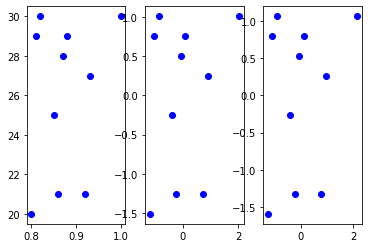

In [20]:
plt.subplot(131)
plt.plot(data['TB'],data['BB'],'bo')
plt.subplot(132)
plt.plot(data['Z TB PD'],data['Z BB PD'],'bo')
plt.subplot(133)
plt.plot(data['Z TB NP'],data['Z BB NP'],'bo')

### Standarisaasi dengan Sklearn

In [22]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler1= StandardScaler()
scaler1.fit(data[['TB']])
ztb= scaler1.transform(data[['TB']])


In [39]:
scaler2= StandardScaler()
scaler2.fit(data[['BB']])
zbb= scaler2.transform(data[['BB']])

In [40]:
data['Z TB SKL']= ztb
data['Z BB SKL']= zbb
data

,TB,BB,Z TB PD,Z BB PD,Z TB NP,Z BB NP,Z TB SKL,Z BB SKL
0,0.80,20,-1.196248,-1.510526,-1.260957,-1.592235,-1.260957,-1.592235
1,0.85,25,-0.387972,-0.251754,-0.408959,-0.265372,-0.408959,-0.265372
2,0.92,21,0.743614,-1.258772,0.783838,-1.326862,0.783838,-1.326862
3,0.88,29,0.096993,0.755263,0.102240,0.796117,0.102240,0.796117
4,0.82,30,-0.872938,1.007018,-0.920158,1.061490,-0.920158,1.061490
5,0.86,21,-0.226317,-1.258772,-0.238559,-1.326862,-0.238559,-1.326862
6,0.87,28,-0.064662,0.503509,-0.068160,0.530745,-0.068160,0.530745
7,0.93,27,0.905269,0.251754,0.954237,0.265372,0.954237,0.265372
8,0.81,29,-1.034593,0.755263,-1.090557,0.796117,-1.090557,0.796117
9,1.00,30,2.036856,1.007018,2.147034,1.061490,2.147034,1.061490


### inverse transform dari Z ke nilai asli

In [42]:
invTB=scaler1.inverse_transform(data['Z TB SKL'])
print(invTB)


[0.8  0.85 0.92 0.88 0.82 0.86 0.87 0.93 0.81 1.  ]


In [43]:
invBB=scaler2.inverse_transform(data['Z BB SKL'])
print(invBB)

[20. 25. 21. 29. 30. 21. 28. 27. 29. 30.]
